## ANÁLISIS COMPARATIVO DE LACTATO EN COBAS C 503 Y GASOMETRO

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import pearsonr

# EXPORTACIÓN DE DATOS DE EXCEL Y PREPARACIÓN DE LOS DATOS PARA TRABAJAR

In [2]:
ruta_archivo = 'BD general.xlsx'
columnas_interes = ['Peticion nº', 'LACTATO FLUORURO', 'LACTATO GASOMETRÍA']

df = pd.read_excel(ruta_archivo, usecols=columnas_interes)

print(df.head())

df.to_csv('lactato_comparacion.csv', index=False)

print("Datos extraídos y guardados correctamente en 'lactato_comparacion.csv'")


   Peticion nº  LACTATO FLUORURO  LACTATO GASOMETRÍA
0      1230204              16.0                  19
1      1245739              12.0                  14
2      1244701              16.5                  20
3      9012168              17.0                  17
4      1244709              21.3                  22
Datos extraídos y guardados correctamente en 'lactato_comparacion.csv'


# COEFICIENTE DE CORRELACIÓN DE PEARSON

In [3]:
df = pd.read_csv('lactato_comparacion.csv')

df = df.dropna(subset=['LACTATO FLUORURO', 'LACTATO GASOMETRÍA'])

fluoruro = df['LACTATO FLUORURO']
gasometria = df['LACTATO GASOMETRÍA']

r, p_value = pearsonr(fluoruro, gasometria)

print(f"Coeficiente de correlación de Pearson (r): {r:.4f}")
print(f"Valor p: {p_value:.4e}")

Coeficiente de correlación de Pearson (r): 0.9687
Valor p: 3.3375e-101


# ANÁLISIS DE BLAND-ALTMAN

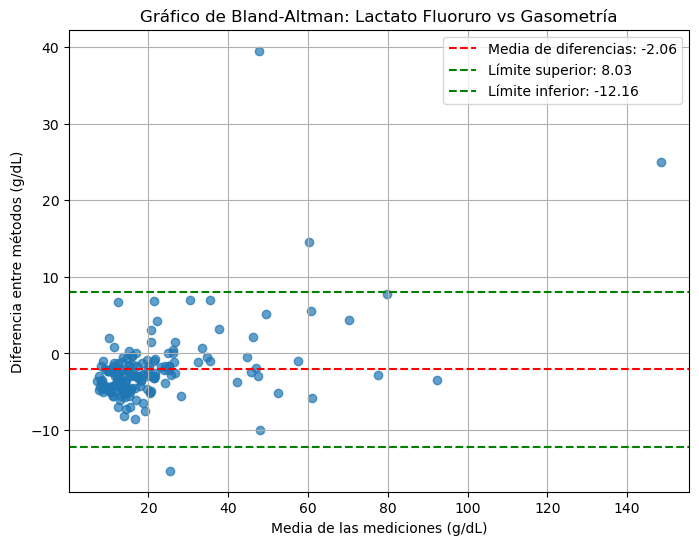

Media de las diferencias: -2.0645
Límite superior (IC95%): 8.0343
Límite inferior (IC95%): -12.1632


In [4]:
df = pd.read_csv('lactato_comparacion.csv')

df = df.dropna(subset=['LACTATO FLUORURO', 'LACTATO GASOMETRÍA'])

fluoruro = df['LACTATO FLUORURO']
gasometria = df['LACTATO GASOMETRÍA']

media = (fluoruro + gasometria) / 2
diferencia = fluoruro - gasometria

media_diff = np.mean(diferencia)
sd_diff = np.std(diferencia, ddof=1)

limite_superior = media_diff + 1.96 * sd_diff
limite_inferior = media_diff - 1.96 * sd_diff

plt.figure(figsize=(8, 6))
plt.scatter(media, diferencia, alpha=0.7)
plt.axhline(media_diff, color='red', linestyle='--', label=f'Media de diferencias: {media_diff:.2f}')
plt.axhline(limite_superior, color='green', linestyle='--', label=f'Límite superior: {limite_superior:.2f}')
plt.axhline(limite_inferior, color='green', linestyle='--', label=f'Límite inferior: {limite_inferior:.2f}')
plt.title('Gráfico de Bland-Altman: Lactato Fluoruro vs Gasometría')
plt.xlabel('Media de las mediciones (g/dL)')
plt.ylabel('Diferencia entre métodos (g/dL)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Media de las diferencias: {media_diff:.4f}")
print(f"Límite superior (IC95%): {limite_superior:.4f}")
print(f"Límite inferior (IC95%): {limite_inferior:.4f}")


# REGRESIÓN PASSING BABLOCK

In [5]:
df = pd.read_csv('lactato_comparacion.csv')

df = df.dropna(subset=['LACTATO FLUORURO', 'LACTATO GASOMETRÍA'])

x = df['LACTATO FLUORURO']
y = df['LACTATO GASOMETRÍA']

slopes = []
for i in range(len(x)):
    for j in range(i + 1, len(x)):
        if x[j] != x[i]:
            slopes.append((y[j] - y[i]) / (x[j] - x[i]))

slope_pb = np.median(slopes)

intercepts = y - slope_pb * x
intercept_pb = np.median(intercepts)

n_slopes = len(slopes)
sorted_slopes = np.sort(slopes)
lower_slope_idx = int((n_slopes - 1) * 0.025)
upper_slope_idx = int((n_slopes - 1) * 0.975)
slope_ci = (sorted_slopes[lower_slope_idx], sorted_slopes[upper_slope_idx])

n_intercepts = len(intercepts)
sorted_intercepts = np.sort(intercepts)
lower_intercept_idx = int((n_intercepts - 1) * 0.025)
upper_intercept_idx = int((n_intercepts - 1) * 0.975)
intercept_ci = (sorted_intercepts[lower_intercept_idx], sorted_intercepts[upper_intercept_idx])

print(f'Ecuación de Passing-Bablok: y = {intercept_pb:.4f} + {slope_pb:.4f} x')
print(f'Ordenada en el origen (IC95%): {intercept_pb:.4f} ({intercept_ci[0]:.4f} a {intercept_ci[1]:.4f})')
print(f'Pendiente (IC95%): {slope_pb:.4f} ({slope_ci[0]:.4f} a {slope_ci[1]:.4f})')

Ecuación de Passing-Bablok: y = 5.1720 + 0.8602 x
Ordenada en el origen (IC95%): 5.1720 (-2.4946 a 12.1613)
Pendiente (IC95%): 0.8602 (-2.5000 a 4.4444)
